In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/BlinkIT Grocery Data.csv')

In [ ]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [ ]:

print("Shape of the dataset:", df.shape)
print("Size of the dataset:", df.size)

Shape of the dataset: (8523, 12)
Size of the dataset: 102276


In [ ]:
# prompt: names of columns

print("Columns of the dataset:", df.columns)

Columns of the dataset: Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:

df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})







In [ ]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']


In [ ]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $1,201,681.49


In [ ]:
average_sales = df['Sales'].mean()
print(f"Average Sales: ${average_sales:,.2f}")

Average Sales: $140.99


In [ ]:
no_of_items = df['Item Identifier'].count()
print("Number of Items:", no_of_items)

Number of Items: 8523


In [ ]:
average_rating = df['Rating'].mean()
print("Average Rating:",round(average_rating,2))

Average Rating: 3.97


Text(0.5, 1.0, 'Sales by Fat Content')

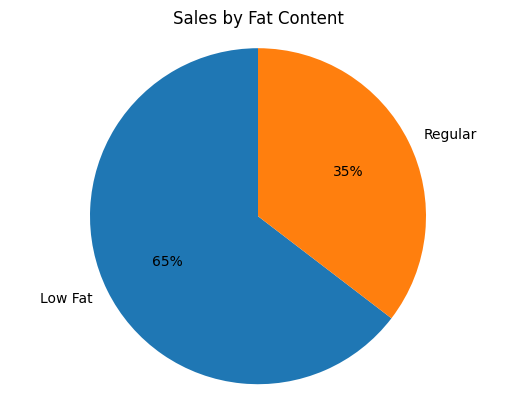

In [ ]:
#calculating total sales based on different item fat content
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()
# sales_by_fat_content['Sales'] = sales_by_fat_content['Sales'].apply(lambda x: f'{x:,.2f}')
sales_by_fat_content
plt.pie(sales_by_fat_content, labels=sales_by_fat_content.index, autopct="%.0f%%", startangle=90)
plt.axis('equal')
plt.title('Sales by Fat Content')

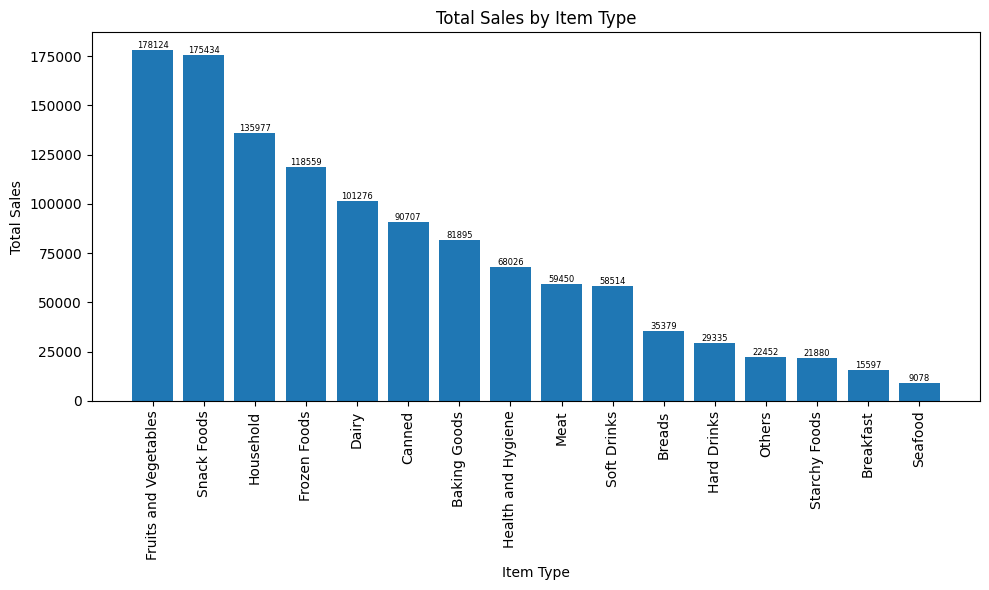

In [ ]:
#calculating total sales based on different types of items
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_item_type
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
# for index, value in enumerate(sales_by_item_type.values):
#     plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', rotation=0, fontsize = 6)
for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize = 6)
plt.tight_layout()

**Fat Content By Outlet For Sales**

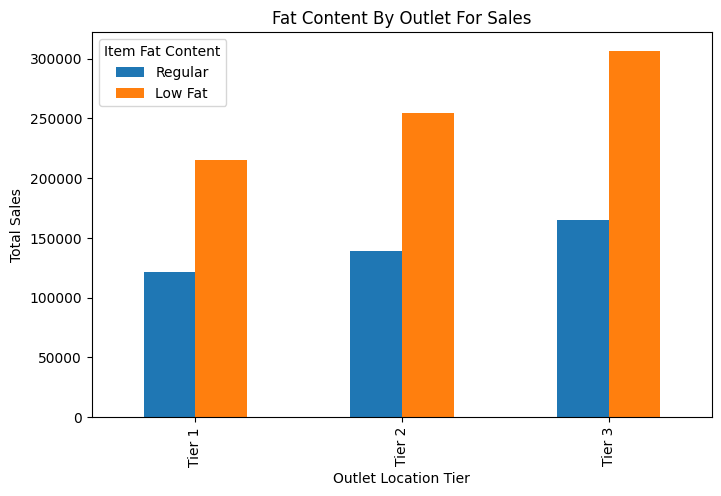

In [ ]:
#calculating total sales based on  item fat content for different outlets
grouped = df.groupby(["Outlet Location Type","Item Fat Content"])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]
axis = grouped.plot(kind='bar', figsize = (8,5), title = 'Fat Content By Outlet For Sales')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.legend(title ='Item Fat Content')
# for index, value in enumerate(sales_by_item_type.values):
#     plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', rotation=0, fontsize = 6)


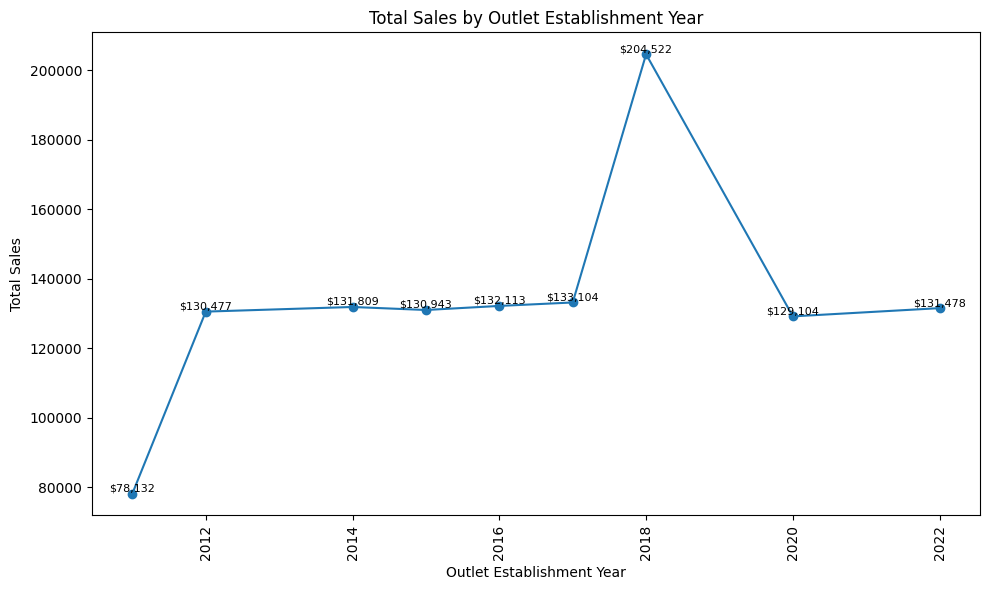

In [21]:
#calculating total sales based on different years when the outlets were established
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index(ascending=False)
sales_by_year
plt.figure(figsize=(10, 6))
plt.plot( sales_by_year.index, sales_by_year.values, marker = 'o',linestyle = '-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')
plt.xticks(rotation=90)
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize = 8)
    plt.tight_layout()

Text(0.5, 1.0, 'Sales by Fat Content')

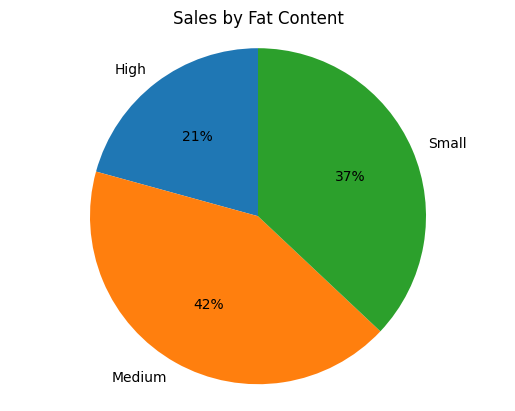

In [22]:
#calculating total sales based on different sizes of outlets
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()
sales_by_outlet_size
plt.pie(sales_by_outlet_size, labels=sales_by_outlet_size.index, autopct="%.0f%%", startangle=90)
plt.axis('equal')
plt.title('Sales by Fat Content')

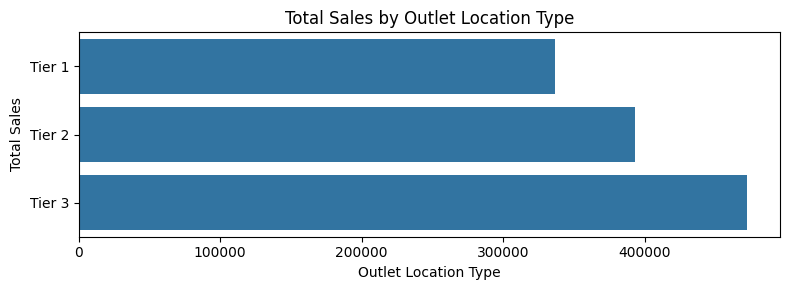

In [23]:
#calculating total sales based on different outlet location types
sales_by_outlet_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_outlet_location
plt.figure(figsize=(8, 3))
axis = sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_outlet_location)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location Type')
plt.tight_layout()